In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from fbprophet import Prophet
from sklearn import preprocessing

In [2]:
#downloaded the csv file from https://docs.google.com/spreadsheets/d/16EqUFFMtdN9oauKbHYqqPCXM1CxL_xyKg0IDfBoceNY/edit#gid=1198809465
df= pd.read_csv('example texts for historical events - news_articles_2020.csv')
df.head(10)

,event_id,country,name_adm1,event,date,link,title,is_correct_event,is_correct_place
0,b'-0503aNe5nf9xUXqWcC9',United Republic of Tanzania,Tabora,FLOOD,2020-03-19,NaN,NaN,NaN,NaN
1,b'-TFcs46ySILL7NkSljJ_',Serbia,LJIG,FLOOD,2020-06-23,NaN,NaN,NaN,NaN
2,b'-dxShXUh4y3K482Sgn3K',Ghana,ASHANTI,FLOOD,2020-06-28,NaN,NaN,NaN,NaN
3,b'-xpegEVCy7mDKLpy8wEM',United Republic of Tanzania,Lindi,FLOOD,2020-01-23,NaN,NaN,NaN,NaN
4,b'01CahwPOzh_XDzfQe91A',United Republic of Tanzania,Mbeya,FLOOD,2020-07-02,NaN,NaN,NaN,NaN
5,b'03iRjwbxvLTS4sv5CPy8',Ghana,SAVANNAH,FLOOD,2020-09-01,https://allafrica.com/stories/202009020178.html,"Ghana: Chief, Others Grabbed for Brutalising 6...",NaN,NaN
6,b'05mLtG7QJW89bLLZSdbe',Serbia,ÈAÈAK-GRAD,FLOOD,2020-06-23,NaN,NaN,NaN,NaN
7,b'0a4gz5T7rIFnR7DiCQiI',Serbia,BRUS,FLOOD,2020-06-19,NaN,NaN,NaN,NaN
8,b'0hikzz2ICTjtkwGcVd-6',Albania,Korçë,FLOOD,2020-07-20,NaN,NaN,NaN,NaN
9,b'0jg_IJEcuFXDWs6neGp0',United Republic of Tanzania,Lindi,FLOOD,2020-01-23,NaN,NaN,NaN,NaN


In [3]:
#created a new datafrme containing only date and event columns
df_1 = df[['date', 'event']]
df_1

,date,event
0,2020-03-19,FLOOD
1,2020-06-23,FLOOD
2,2020-06-28,FLOOD
3,2020-01-23,FLOOD
4,2020-07-02,FLOOD
...,...,...
1169,2020-10-10,FLOOD
1170,2020-10-10,FLOOD
1171,2020-10-10,FLOOD
1172,2020-10-10,FLOOD


In [4]:
df_1.dtypes


date     object
event    object
dtype: object

In [5]:
df_1[df_1.isnull().any(axis=1)]

,date,event


In [6]:
df_1["event"].value_counts()

FLOOD      1148
DROUGHT      26
Name: event, dtype: int64

In [7]:
df_1['date'] = pd.to_datetime(df_1['date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
le = preprocessing.LabelEncoder()
df_1['event'] = le.fit_transform(df_1['event'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
df_1.dtypes

date     datetime64[ns]
event             int64
dtype: object

In [11]:
df_1= df_1.rename(columns={'date':'ds', 'event':'y'})
df_1

,ds,y
0,2020-03-19,1
1,2020-06-23,1
2,2020-06-28,1
3,2020-01-23,1
4,2020-07-02,1
...,...,...
1169,2020-10-10,1
1170,2020-10-10,1
1171,2020-10-10,1
1172,2020-10-10,1


In [13]:
m = Prophet(daily_seasonality=True)
m.fit(df_1)

Fitting the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor.Daily seasonality set to true. Then called its fit method and passed in the historical dataframe.

In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
534,2050-06-21
535,2050-06-22
536,2050-06-23
537,2050-06-24
538,2050-06-25


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
534,2050-06-21,1.024059,0.845007,1.199913
535,2050-06-22,1.001790,0.823921,1.177681
536,2050-06-23,0.996888,0.820966,1.178487
537,2050-06-24,0.991147,0.810605,1.167921
538,2050-06-25,1.006370,0.826635,1.201355


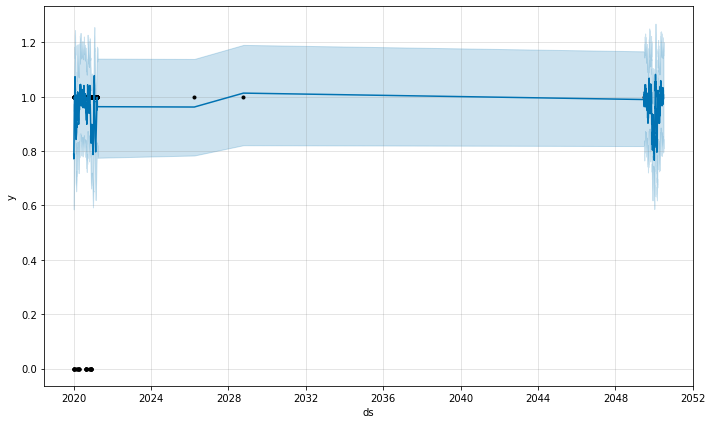

In [16]:
fig1 = m.plot(forecast)

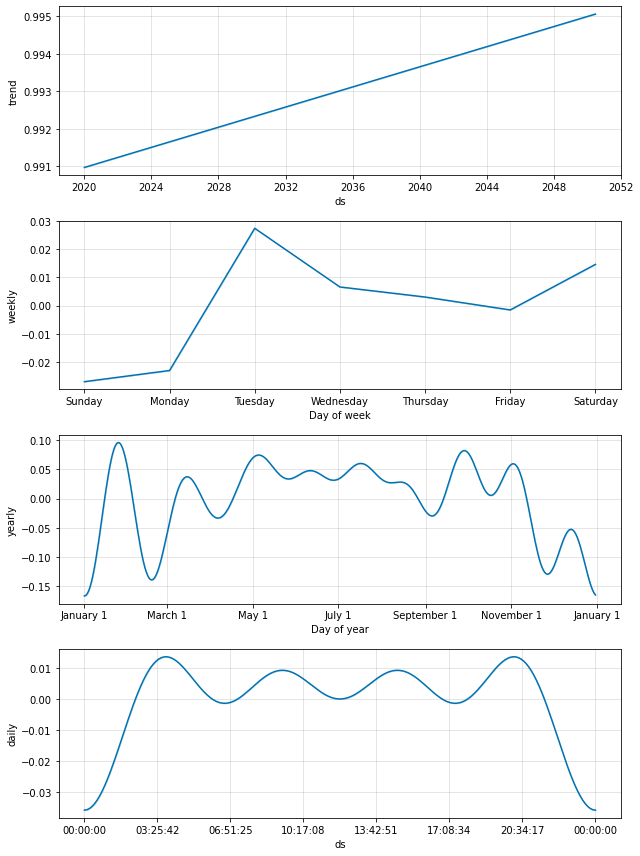

In [17]:
fig2 = m.plot_components(forecast)


In [19]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [20]:
plot_components_plotly(m, forecast)
